<h1>Import library</h1>

In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

In [2]:
#read the dataset
data = pd.read_csv("D:\Machine Learning Intern/mldata.csv")
data.head()
data.shape

(9551, 21)

In [3]:
#checking null values
null_data = data.isnull().sum()
null_data

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
#Remove null rows
df_cleaned =  data.dropna()
df_cleaned.reset_index(drop = True, inplace = True)
print("The shape of cleaned dataset:",df_cleaned.shape)

The shape of cleaned dataset: (9542, 21)


In [5]:
#importing models to  convert categorical value into numerical value
target = TargetEncoder()
binary_encoder = LabelEncoder()

In [6]:
#convert feature into numerical value based on the Target value
df_cleaned['City'] = target.fit_transform(df_cleaned['City'],df_cleaned['Aggregate rating'])
df_cleaned['Cuisines'] = target.fit_transform(df_cleaned['Cuisines'],df_cleaned['Aggregate rating'])
df_cleaned['Locality'] = target.fit_transform(df_cleaned['Locality'], df_cleaned['Aggregate rating'])
df_cleaned['Currency'] = target.fit_transform(df_cleaned['Currency'], df_cleaned['Aggregate rating'])
df_cleaned['Has Table booking'] = binary_encoder.fit_transform(df_cleaned['Has Table booking'])
df_cleaned['Has Online delivery'] = binary_encoder.fit_transform(df_cleaned['Has Online delivery'])
df_cleaned['Is delivering now'] = binary_encoder.fit_transform(df_cleaned['Is delivering now'])
df_cleaned['Switch to order menu'] = binary_encoder.fit_transform(df_cleaned['Switch to order menu'])
df_cleaned['Rating color'] = target.fit_transform(df_cleaned['Rating color'], df_cleaned['Aggregate rating'])
df_cleaned['Rating text'] = target.fit_transform(df_cleaned['Rating text'], df_cleaned['Aggregate rating'])
df_cleaned['Restaurant Name'] = target.fit_transform(df_cleaned['Restaurant Name'], df_cleaned['Aggregate rating'])
df_cleaned['Locality Verbose'] = target.fit_transform(df_cleaned['Locality Verbose'], df_cleaned['Aggregate rating'])


C:\Users\aajay\AppData\Local\Temp\ipykernel_26564\898614436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['City'] = target.fit_transform(df_cleaned['City'],df_cleaned['Aggregate rating'])
C:\Users\aajay\AppData\Local\Temp\ipykernel_26564\898614436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cuisines'] = target.fit_transform(df_cleaned['Cuisines'],df_cleaned['Aggregate rating'])
C:\Users\aajay\AppData\Local\Temp\ipykernel_26564\898614436.py:4: SettingWithCopyWarning: 
A v

In [7]:
df_cleaned.tail(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9532,5905215,2.864923,208,3.241975,"Emirgan Mahallesi, Sak?p Sabanc? Caddesi, No 4...",2.864923,2.864923,29.056620,41.104969,2.864923,...,3.976618,0,0,0,0,3,4.2,4.167904,4.167904,877
9533,5926979,2.799869,208,3.241975,"Cafera??a Mahallesi, Ne??et ?_mer Sokak, No 9/...",2.799869,2.799869,29.022805,40.989705,2.833298,...,3.976618,0,0,0,0,3,3.7,3.683063,3.683063,506
9534,5916085,2.903956,208,3.241975,"Kemanke?? Karamustafa Pa??a Mahallesi, Hoca Ta...",2.956646,2.956646,28.978237,41.024633,2.890970,...,3.976618,0,0,0,0,2,4.5,4.659667,4.659667,761
9535,5915547,2.929978,208,3.241975,"Kemanke?? Karamustafa Pa??a Mahallesi, R?ht?m ...",2.956646,2.956646,28.977636,41.022904,2.929978,...,3.976618,0,0,0,0,2,4.7,4.659667,4.659667,1305
9536,5915054,2.877934,208,3.241975,"Kemanke?? Karamustafa Pa??a Mahallesi, K?l??_ ...",2.956646,2.956646,28.981103,41.025785,2.877934,...,3.976618,0,0,0,0,3,4.3,4.167904,4.167904,870
9537,5915730,2.851913,208,3.241975,"Kemanke?? Karamustafa Pa??a Mahallesi, R?ht?m ...",2.956646,2.956646,28.977392,41.022793,2.788664,...,3.976618,0,0,0,0,3,4.1,4.167904,4.167904,788
9538,5908749,2.864923,208,3.241975,"Ko??uyolu Mahallesi, Muhittin ??st?_nda?? Cadd...",2.864923,2.864923,29.041297,41.009847,2.864923,...,3.976618,0,0,0,0,3,4.2,4.167904,4.167904,1034
9539,5915807,2.799869,208,3.241975,"Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...",2.833298,2.833298,29.034640,41.055817,2.799869,...,3.976618,0,0,0,0,4,3.7,3.683063,3.683063,661
9540,5916112,2.838902,208,3.241975,"Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...",2.833298,2.833298,29.036019,41.057979,2.833298,...,3.976618,0,0,0,0,4,4.0,4.167904,4.167904,901
9541,5927402,2.838902,208,3.241975,"Cafea??a Mahallesi, Bademalt? Sokak, No 21/B, ...",2.838902,2.838902,29.026016,40.984776,2.890970,...,3.976618,0,0,0,0,2,4.0,4.167904,4.167904,591


In [8]:
#scalinng it
scaler = StandardScaler()

In [9]:
numerical_features = ['Average Cost for two', 'Price range', 'Longitude', 'Latitude']
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

C:\Users\aajay\AppData\Local\Temp\ipykernel_26564\1651671700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [10]:
#split data 
X = df_cleaned.drop(columns=['Aggregate rating', 'Address'])
y = df_cleaned['Aggregate rating']

In [11]:
df_cleaned.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,2.942989,162,2.946779,"Third Floor, Century City Mall, Kalayaan Avenu...",2.942989,2.942989,1.377641,-1.024849,2.942989,...,3.656558,1,0,0,0,1.319726,4.8,4.659667,4.659667,314
1,6304287,2.903956,162,2.946779,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",2.903956,2.903956,1.377315,-1.025915,3.035497,...,3.656558,1,0,0,0,1.319726,4.5,4.659667,4.659667,591
2,6300002,2.890945,162,2.994442,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",2.890945,2.890945,1.378352,-1.023399,2.890945,...,3.656558,1,0,0,0,2.424069,4.4,4.167904,4.167904,270
3,6318506,2.955999,162,2.994442,"Third Floor, Mega Fashion Hall, SM Megamall, O...",2.979538,2.979538,1.378344,-1.023043,3.286110,...,3.656558,0,0,0,0,2.424069,4.9,4.659667,4.659667,365
4,6314302,2.942989,162,2.994442,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",2.979538,2.979538,1.378369,-1.023122,2.886859,...,3.656558,1,0,0,0,2.424069,4.8,4.659667,4.659667,229


<h1>Model Evaluation</h1>

In [12]:
#importing ml algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
linear_reg = LinearRegression()
decision_reg = DecisionTreeRegressor(random_state = 42)
random_forest = RandomForestRegressor(random_state = 42)
gradient_boosting = GradientBoostingRegressor(random_state = 43)

In [15]:
#model training
linear_reg.fit(X_train, y_train)
decision_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=43)

In [17]:
#Testing evaluation score
y_pred_lr = linear_reg.predict(X_test)
y_pred_dt = decision_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

In [18]:
def evaluation_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

mae_lr, mse_lr, r2_lr = evaluation_model(y_test, y_pred_lr)
mae_dt, mse_dt, r2_dt = evaluation_model(y_test, y_pred_dt)
mae_rf, mse_rf, r2_rf = evaluation_model(y_test, y_pred_rf)
mae_gb, mse_gb, r2_gb = evaluation_model(y_test, y_pred_gb)

In [19]:
#Testing score on 
print("Linear Regression: MAE = ", mae_lr, ", MSE=", mse_lr, ", R2 =", r2_lr)
print("Decision Tree: MAE = ", mae_dt, ", MSE=", mse_dt, ", R2 =", r2_dt)
print("Random Forest: MAE = ", mae_rf, ", MSE=", mse_rf, ", R2 =", r2_rf)
print("Gradient Boosting: MAE = ", mae_gb, ", MSE=", mse_gb, ", R2 =", r2_gb)

Linear Regression: MAE =  0.12976438312651536 , MSE= 0.029756845540013933 , R2 = 0.9870059270235544
Decision Tree: MAE =  0.05065479308538843 , MSE= 0.01867469879518072 , R2 = 0.9918452243658887
Random Forest: MAE =  0.04172446306967168 , MSE= 0.010358139339968559 , R2 = 0.9954768586508017
Gradient Boosting: MAE =  0.06155192079232643 , MSE= 0.01177862259515801 , R2 = 0.9948565690083754


In [20]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [21]:
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

In [22]:
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [23]:
print("Training Set Evaluation Metrics:")
print("R-squared (R2):", train_r2)
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)

print("\nTest Set Evaluation Metrics:")
print("R-squared (R2):", test_r2)
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)

Training Set Evaluation Metrics:
R-squared (R2): 0.9993720716434786
Mean Absolute Error (MAE): 0.014858771125378716
Mean Squared Error (MSE): 0.0014456188916546593

Test Set Evaluation Metrics:
R-squared (R2): 0.9954768586508017
Mean Absolute Error (MAE): 0.04172446306967168
Mean Squared Error (MSE): 0.010358139339968559


<h1>Prediction Visualization</h1>

C:\Users\aajay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aajay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aajay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aajay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

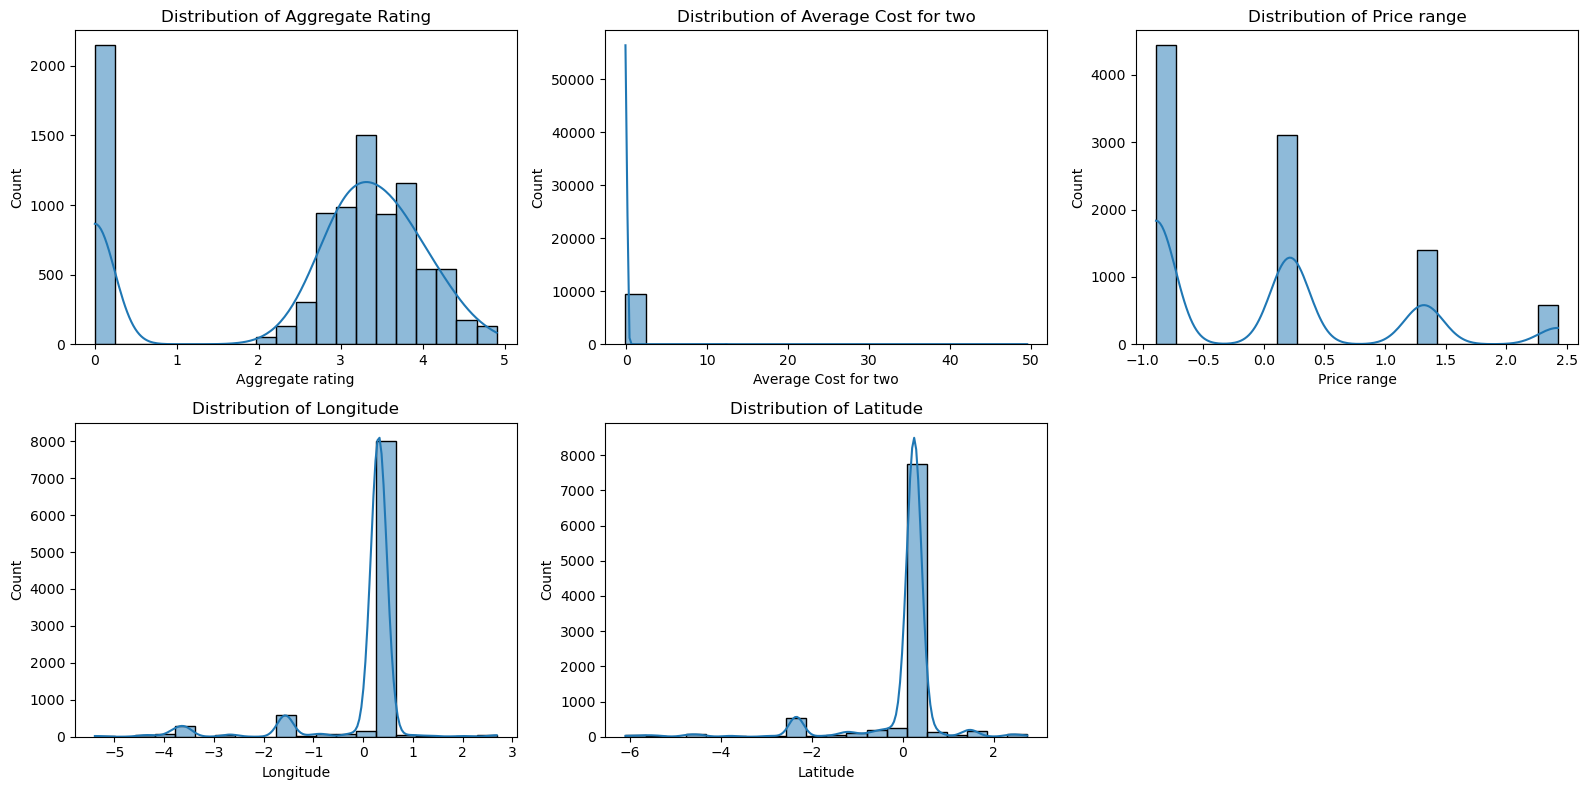

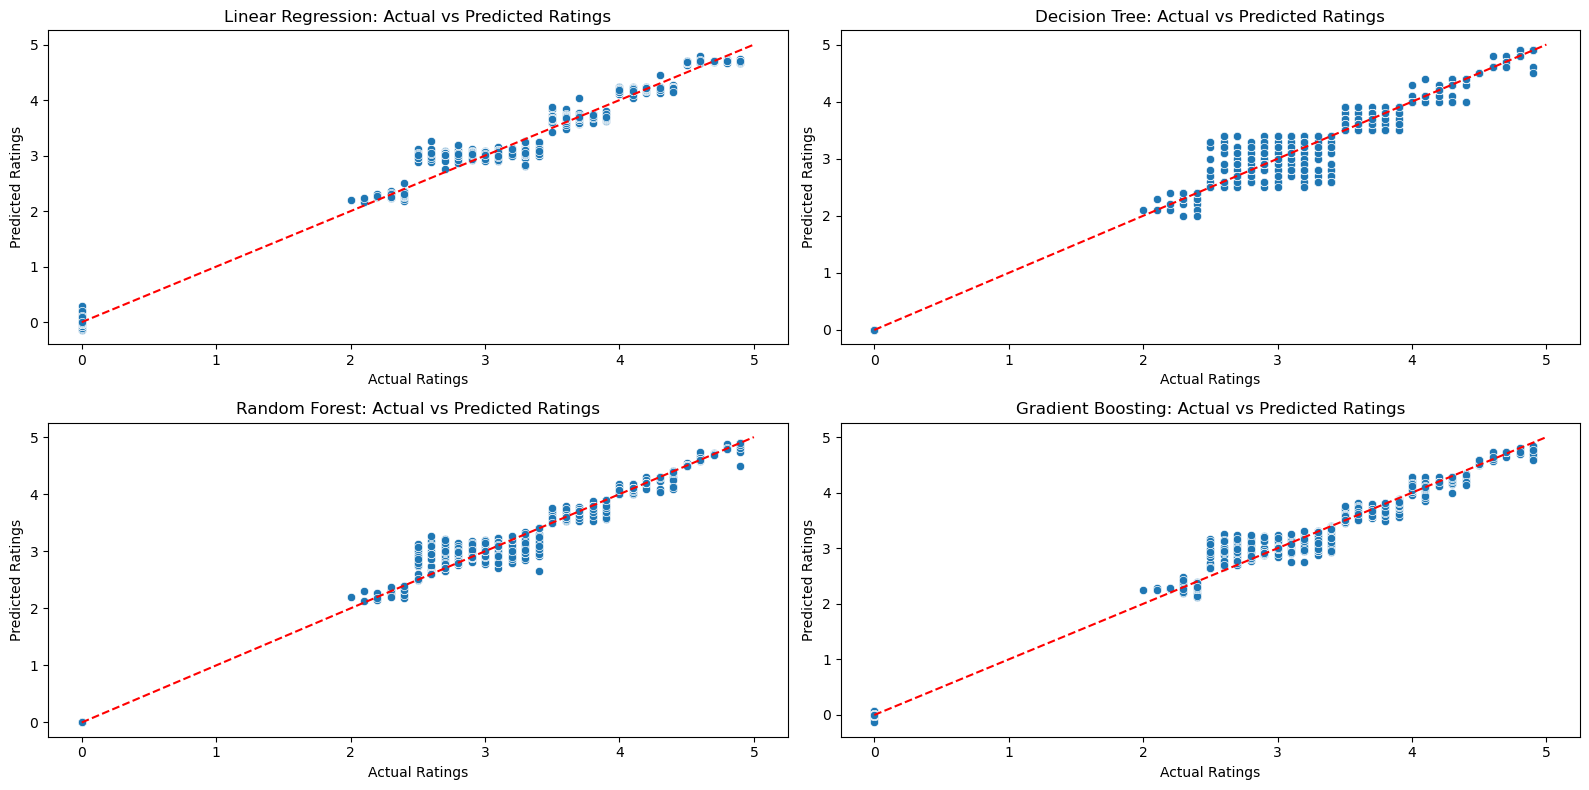

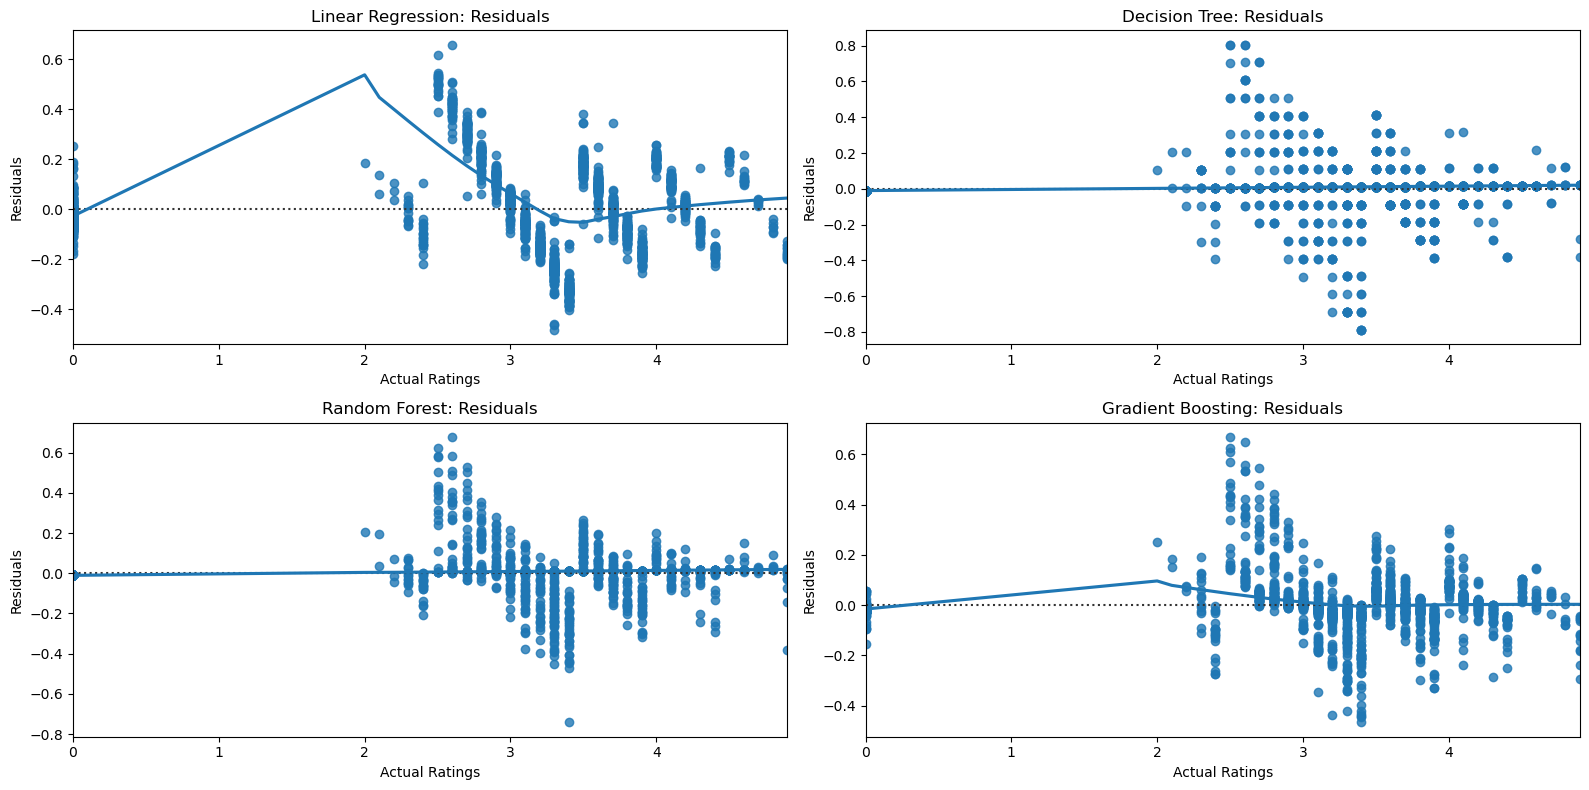

In [25]:

plt.figure(figsize=(16, 8))
# Distribution of target variable
plt.subplot(2, 3, 1)
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')

# Distribution of scaled numerical features
for i, feature in enumerate(numerical_features, 2):
    plt.subplot(2, 3, i)
    sns.histplot(df_cleaned[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Actual vs Predicted ratings
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression: Actual vs Predicted Ratings')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Decision Tree: Actual vs Predicted Ratings')

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest: Actual vs Predicted Ratings')

plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Gradient Boosting: Actual vs Predicted Ratings')

plt.tight_layout()
plt.show()

# Residual plots
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.residplot(x=y_test, y=y_pred_lr, lowess=True)
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')

plt.subplot(2, 2, 2)
sns.residplot(x=y_test, y=y_pred_dt, lowess=True)
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals')

plt.subplot(2, 2, 3)
sns.residplot(x=y_test, y=y_pred_rf, lowess=True)
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals')

plt.subplot(2, 2, 4)
sns.residplot(x=y_test, y=y_pred_gb, lowess=True)
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residuals')

plt.tight_layout()
plt.show()